<a href="https://colab.research.google.com/github/leonnmarcoo/CCADMACL_EXERCISES_COM232/blob/main/Exercise%202B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/IMF_advanced_economies_and_UN_least_developed_countries.svg/960px-IMF_advanced_economies_and_UN_least_developed_countries.svg.png"/>

## Dataset feature description

 - child mort - Death of children under 5 years of age per 1000 live births

- exports - Exports of goods and services per capita. Given as %age of the GDP per capita
- health - Total health spending per capita. Given as %age of GDP per capita
- import - Imports of goods and services per capita. Given as %age of the GDP per capita
- income - Net income per person
- inflation - The measurement of the annual growth rate of the Total GDP
- life_expec - The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp - The GDP per capita. Calculated as the Total GDP divided by the total population.

In [191]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [192]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
import plotly.express as px


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [193]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [194]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [195]:
df.shape

(167, 10)

Show summary statistics using `describe()`. `(5 pts)`

In [196]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [197]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [198]:
new_df = df.select_dtypes(include=[np.number])
new_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [199]:
scaler = MinMaxScaler()
new_df[['income', 'gdpp']] = scaler.fit_transform(new_df[['income', 'gdpp']])
new_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,0.008047,9.440,56.2,5.82,0.003073
1,16.6,28.0,6.55,48.6,0.074933,4.490,76.3,1.65,0.036833
2,27.3,38.4,4.17,31.4,0.098809,16.100,76.5,2.89,0.040365
3,119.0,62.3,2.85,42.9,0.042535,22.400,60.1,6.16,0.031488
4,10.3,45.5,6.03,58.9,0.148652,1.440,76.8,2.13,0.114242
5,14.5,18.9,8.10,16.0,0.145437,20.900,75.8,2.37,0.096107
6,18.1,20.8,4.40,45.3,0.048967,7.770,73.3,1.69,0.028529
7,4.8,19.8,8.73,20.9,0.327926,1.160,82.0,1.93,0.493171
8,4.3,51.3,11.00,47.8,0.342396,0.873,80.5,1.44,0.445447
9,39.2,54.3,5.88,20.7,0.123731,13.800,69.1,1.92,0.053537


## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

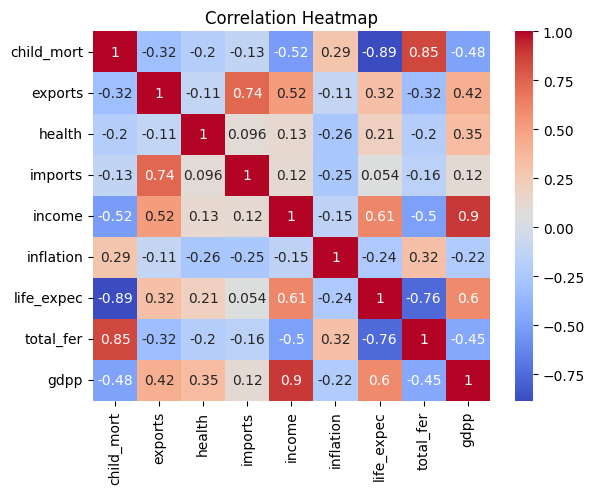

In [200]:
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

###**income, gdpp, and exports**

The variables **income & gdpp** appears strongly related in terms of socioeconomic status. With a value of **(0.9)** on the correlation matrix, it has the highest corrlation among all the other variables pairing. It means that when the value of **income** increases, the **gdpp** increases as well or vice versa. While **exports** does have a middle correlation with **income (0.52)** and **gdpp (0.42)**, it is worth trying to add it since in real world, the number of exports highly contribute to the socioeconomic status of a country.




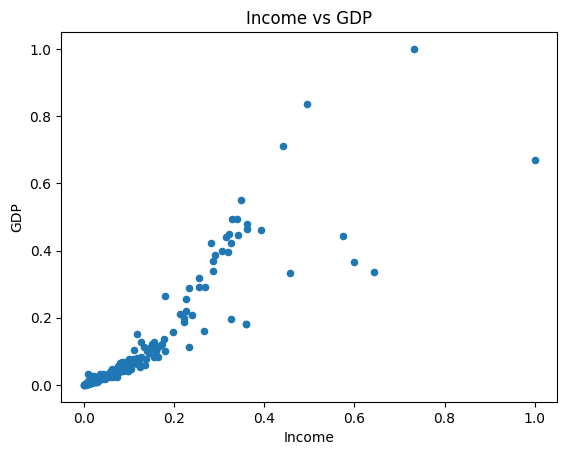

In [201]:
new_df.plot.scatter(x='income', y='gdpp')
plt.xlabel('Income')
plt.ylabel('GDP')
plt.title('Income vs GDP')
plt.show()

In [202]:
three_df = df [['income', 'gdpp', 'exports']]

In [203]:
fig = px.scatter_3d(new_df, x='income', y='gdpp', z='exports')
fig.show()

## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

Text(0, 0.5, 'Euclidean distance in the space with other variables')

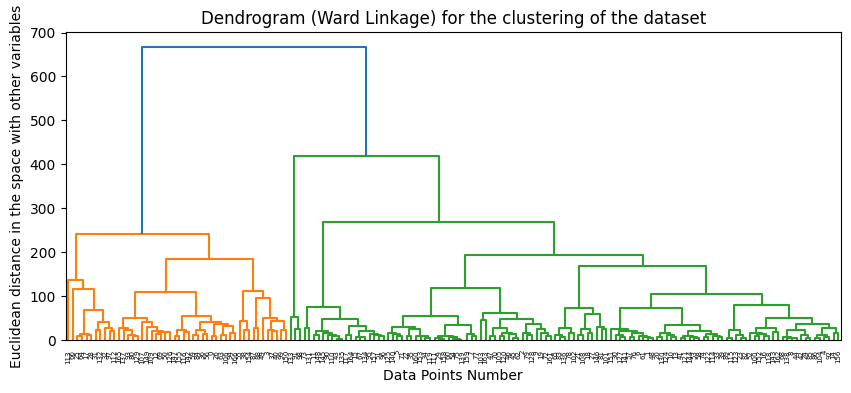

In [204]:
Z = sch.linkage(new_df, method = 'ward')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Ward Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

###**Three (3) clusters**

I chose three clusters because the distance between them is not too far away, meaning the data points there are still very similar. Unlike with 1 and 2 clusters, there's a long distance in the dendrogram. It just means that they are combined just becase that's the remaining cluster. That's why 3 clusters makes the most sense.

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [205]:
cluster_H = AgglomerativeClustering(n_clusters=3,linkage= 'ward')

model_clt = cluster_H.fit(three_df)
print(model_clt)
print('\n')

three_df['clusters'] = model_clt.labels_
print('Clusters assigned to each datapoints, cluster = 3 :')
print(three_df['clusters'])

AgglomerativeClustering(n_clusters=3)


Clusters assigned to each datapoints, cluster = 3 :
0      2
1      2
2      2
3      2
4      1
      ..
162    2
163    1
164    2
165    2
166    2
Name: clusters, Length: 167, dtype: int64


/tmp/ipython-input-810428231.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

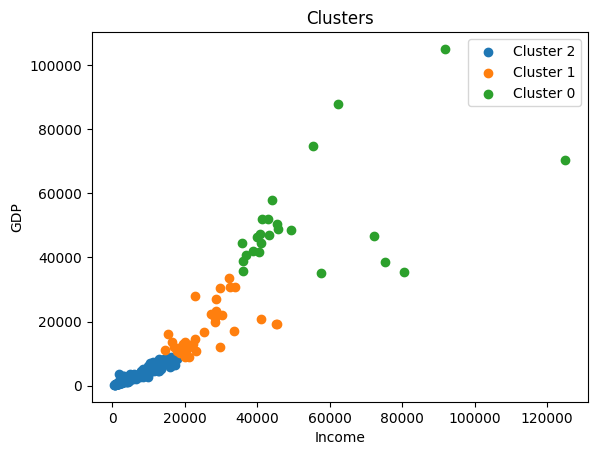

In [206]:
unique_clusters = three_df['clusters'].unique()

for cluster_label in unique_clusters:
    cluster_data = three_df[three_df['clusters'] == cluster_label]
    plt.scatter(cluster_data['income'], cluster_data['gdpp'], label=f'Cluster {cluster_label}')

plt.xlabel('Income')
plt.ylabel('GDP')
plt.title('Clusters')
plt.legend()
plt.show()

In [207]:
fig = px.scatter_3d(three_df, x='income', y='gdpp', z='exports', color='clusters')
fig.show()

Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

I have a total of 3 clusters, I can categorize them into low, middle, and high-income country. The patterns are when the **income** is around **20k** and less, and typically has less than **20k** in **GDP**, they are **low-income** country. On the other hand, the **middle-income** country is averaging from **20k - 60k** in terms of income, while their **GDP** is around **20k-40k.** Lastly, the there are only few **high-income** country ranging their income from **40k-120k** and their GDP from **40k-100k.**

## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


While there are a lot of things that affects the socioeconimic status of a country, you can still cluster them by just using 3 features which are income, gdp, and exports. This is very helpful when you are restricted into using only numbers of feature. While other features are important as well, it is handy to use these features in times of restriction in choosing the number of features.